## Task I: Read and Try

For the first situation, against the RL Agent trained on 1000 epochs, we won 9 times and tied only once. Similarly, for the second RL Agent, which was trained on 5000 epochs, we won 9 times and tied once. Finally, on the third RL Agent that was trained on 10,000 epochs, we found ourselves winning 6 times and tying 4 times. It was very clear that after 10,000 epochs, the agent had developed strategies to stop us from winning, while 1000 epochs seemed to have more random strategies and 5000 was better, but did not have very good strategies for winning.  
1,000 Epochs  
Win: 9  
Tie: 1  
5,000 Epochs  
Win: 9  
Tie: 1  
10,000 Epochs  
Win: 6  
Tie: 4  


## Task II: Do it by Yourself


### ***Reinforcement Learning - Blackjack Game***

We are training a Reinforcement Learning (RL) agent to play Blackjack. This follows the classic Blackjack game where players have **only** their first two cards face up for the rest of the table to see, so a partial information setup, and the dealer has **only** their first card face up.

We define the action space to be that of a normal Blackjack game: either "hit" or "stand" at each round of a game, where hit is to draw another card from the game deck and stand is to abstain from drawing another card. The basic game goal is hitting the card sum 21, where a player "busts" if their card sum surpasses 21 which is an auto loss for this player.

It is also important to note that the dealer will receive an inherent advantage by playing second in our modified version of Blackjack, playing after its opponent. This is because the RL agent plays fully until the dealer plays, so in the case that the RL agent busts in any given round, the dealer, which always goes second, will win without needing to play. 


**Main** 
We first create a full_deck representing all 52 cards of a normal deck. There are 13 cards (2-10 card value, Jack, Queen, King of value 10, and Ace which we value as 11). Note that ace can have a value of 11 or 1.

We have a round_deck variable to be replenished at the start of every new round between a player and a dealer. This is just a copy of the full_deck and when cards are drawn, they are not replaced (to represent that you cannot draw an already drawn card for this round).

In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016 - 2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)           #
# 2016 Jan Hakenberg(jan.hakenberg@gmail.com)                         #
# 2016 Tian Jun(tianjun.cpp@gmail.com)                                #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################
# from socketserver import BaseRequestHandler
import numpy as np
import random 
import math
import pickle

random.seed(10)

#2-12 -> 2-10 for each numbered card, 11 to represent an ace
full_deck =  list(range(2,12))*4 + [10,10,10]*4
round_deck = list(full_deck)
#print(full_deck)
player_action = [1,0] #1 for hit, 0 for stand - note if player going second stands, then the game has ended and we can compare

#Call this to replenish the deck at the start of every round
def replaceDeck():
    global round_deck 
    round_deck= list(full_deck)

#Takes a card, without replacement, from the round_deck
#Returns the value drawn of that card]
def drawCard():
    drawedCard = np.random.choice(round_deck)
    round_deck.remove(drawedCard)
    return drawedCard

State:
Our main data is contained in our state. The data contains 3 important ints.  
  1) The sum of the player’s cards. This is known to a player.  
  2) The value of the SHOWN dealer card. Since the dealer only shows 1 card, that card value is between 2-11 inclusive. Because the card is face-up, the player knows its value.  
  3) The number of usable aces a player has. Aces are assumed to be 11 and when an ace is of value 11, we add 1 to usable ace. Then, when you are over 21 (and thus in busting range), we see if there are any usable aces the player holds. If so, then we change the value of 1) the sum of the player’s cards by -10 to represent the ace going from value 11 to 1. 

Self.end is a boolean to be changed if we reach an end state, which is when either the player busts, dealer busts, or if both end their turn without busting.

Self.dealer_sum and self.num_of_dealer_aces are helper variables meant to keep track of the dealer’s cards. These are not known to the player and not a part of self.data.

next_state is our method of transitioning to a new state, given a binary action 1 or 0. 1 represents the choice of hitting/drawing a card, and 0 represents standing (which is choosing not to hit and the player ending their turn). If the player hits, we draw a card and add its value to 1) of the player data.

print_state is our method of printing the state. We print the AI player’s sum of cards, the dealer’s (i.e. the role you’re playing) sum of cards, and the number of aces the dealer (you) currently hold.


In [ ]:
class State:
    def __init__(self):
    ##define player state values
    #sum_player_value = sum of player card values
    #dealer_shown_card = the card value of the dealer's shown card
    #num_of_aces = number of aces the player has in his/her hand
        self.data = np.zeros((3,), dtype=int) #this is originally empty, is composed of the elements as follows:
            # 1) int-The sum of the values of cards that the player (RL agent) has
            # 2) int-The value of the shown_dealer card that the dealer has face up
            # 3) int-The number of aces a player current has. 0 indicates the player has no ace.

        #self.hash_val = None
        self.end = False
        self.dealer_sum = 0
        self.num_of_dealer_aces = 0
        

    def next_state(self, action):
        # get current state items
        current_sum = self.data[0]
        shown_dealer_card = self.data[1]
        num_aces = self.data[2]

        #actually perform the action passed
        #hit
        if action:
            card = drawCard()
            if card == 11:
                num_aces+= 1
            
            current_sum += card
        else: #stand
            self.end = True
            self.data = [current_sum, shown_dealer_card,num_aces]

        if current_sum >= 21:
            if current_sum > 21:
                if num_aces > 0:
                    current_sum -= 10
                    num_aces-=1
                else:
                    self.end = True
                    self.data = [current_sum, shown_dealer_card,num_aces]
            else:
                self.end = True
                self.data = [current_sum, shown_dealer_card,num_aces]
        #otherwise game isnt necessarily ended
        self.data = [current_sum, shown_dealer_card,num_aces]

        # since RL opponent goes first, we can print their sum of cards
        # we also print our sum of cards
    def print_state(self):
        print("AI Player sum: ", self.data[0])
        #print("Dealer shown card: ", self.data[1])
        #print("Player aces: ", self.data[2])
        print("Your sum: ", self.dealer_sum)
        print("Your aces: "+ str(self.num_of_dealer_aces) + "\n")

Judger:
We initialize judger to include two players (can be of different classes). Our RL agent is always assumed to be player1.

Our winner function takes in two values: the sum of the player’s cards and the sum of the dealer’s cards. Based on these values, the function returns -1 for a player loss (our RL agent loses), 0 for a tie, and 1 for a RL agent win.

Our reset function simply calls the p1 and p2 references’ reset() calls, explained further below in the various player type classes.

Our play class is where rounds are played in blackjack. We draw two cards for the player, one visible card for the dealer, and note the number of starting aces for the player. This information is encoded into a state. We also draw a separate, unknown card for the dealer to represent two drawn dealer cards. We also note any aces a dealer may have. 
The player1 is always assumed to be our RL agent. They hit or stand based on the call to their act(), which determines for a player class whether to hit (1) or stand(0). Based on this, we can then update the next state and repeat this until the RL player decides to stand - or if they bust. We always append the state to the player1’s player_auction_list in addition to their action for this specific state.
We check if they bust, and if not, we go to the second player’s turn. This can either be a dealer, who has to follow a set policy defined in the dealer class, or a human player, who we instruct to follow the dealer policy for optimal results (since the RL agent has been trained based on a dealer’s policy). 
We then assign a winner_value (1 if RL player wins, 0 for tie, -1 otherwise) and use that winner value to call giveCredit within the player class. The giveCredit function is explained later. 


In [ ]:
# Class that specifies when does the game starts, who moves first, and who wins
# In your own project, this class should be changed based on the game of your choice
class Judger:
    # @player1: the player who will move first, its chessman will be 1
    # @player2: another player with a chessman -1
    def __init__(self, player1, player2):
        self.p1 = player1
        self.p2 = player2
        self.current_player = None

    def winner(self, player_value, dealer_value):
        if player_value > 21:
            if dealer_value > 21:
                #draw
                return 0
            else:
                #player busts so loss
                return -1
        #meaning player hasn't busted here
        else:
            if dealer_value>21:
                #dealer busts, so win
                return 1
            else:
                if player_value < dealer_value:
                    #player loses here
                    return -1
                elif player_value > dealer_value:
                    return 1
                else:
                    #draw
                    return 0

    
    def reset(self):
        self.p1.reset()
        self.p2.reset()
        #self.p1, self.p2 = (self.p2, self.p1)

    # def alternate(self):
    #     while True:
    #         yield self.p1
    #         yield self.p2

    # @print_state: if True, print each board during the game
    def play(self, print_state=False):
        #alternator = self.alternate()

        current_state = State()
        replaceDeck()
        # draw 2 for player 1
        # draw 1 for player 2 #dealer
        # current_state.data[0] = sum of 2 cards for p1
        # current_state.data[1] = dealer shown card
        # current_state.data[2] = num of aces that player has 
        player_sum = 0
        num_of_player_aces = 0
        num_of_dealer_aces = 0
        #Draw 2 cards
        for x in range(2):
            card_drawn = drawCard()
            if card_drawn == 11:
                num_of_player_aces+=1
            player_sum += card_drawn
        #this means that two aces were drawn:
        if player_sum == 22:
          player_sum-=10
          num_of_player_aces-=1
        current_state.data[0] = player_sum
        current_state.data[2] = num_of_player_aces

        shown_dealer_card = drawCard()
        #print("SHOWN DEALER CARD ", shown_dealer_card)
        current_state.data[1] = shown_dealer_card
        #current_state.dealer_sum = shown_dealer_card
        #print(shown_dealer_card)
        #print(num_of_player_aces)
        if shown_dealer_card == 11:
            num_of_dealer_aces = 1
        current_state.num_of_dealer_aces = num_of_dealer_aces

        #draw another card for dealer but do not show the player
        secondCard = drawCard()
        if secondCard == 11:
            num_of_dealer_aces += 1

        dealer_sum = shown_dealer_card + secondCard
        #this means that two aces were drawn:
        if dealer_sum == 22:
            dealer_sum-=10
            num_of_dealer_aces-=1
        if(isinstance(self.p2, HumanPlayer)):
            #end the game (without learning) if either player draws a natural (21)
            if dealer_sum == 21 and not player_sum == 21:
              current_state.print_state()
              return -1
            if player_sum == 21 and not dealer_sum == 21:
              current_state.print_state()
              return 1
            if player_sum == 21 and dealer_sum == 21:
              current_state.print_state()
              return 0
        else:  
          #end the game (without learning) if either player draws a natural (21)
          if dealer_sum == 21 and not player_sum == 21:
              return -1
          if player_sum == 21 and not dealer_sum == 21:
              return 1
          if player_sum == 21 and dealer_sum == 21:
              return 0

        current_state.dealer_sum = dealer_sum
        current_state.num_of_dealer_aces = num_of_dealer_aces
        self.p1.set_state(current_state)

        if print_state:
            current_state.print_state()

        #enter player logic
        while True:
            #self.p1.state.print_state()
            action = self.p1.act()
            #ONLY record values if the decision is non-trivial (sum is above 12 so bustable cards)
            if current_state.data[0] < 22:
              if current_state.data[0] > 11:
                  recordState = [self.p1.state.data, action]
                  self.p1.player_action_list.append(recordState)

            current_state.next_state(action)
            #print(current_state.data)
            self.p1.set_state(current_state)
            if current_state.end:
                break
        
        if(isinstance(self.p2, HumanPlayer)):
          current_state.print_state()

        self.p2.set_state(current_state)

        if(current_state.data[0] <= 21):
          #dealer logic - not human player yet       
          if(isinstance(self.p2, Dealer)):
              dealer_end = 0
              #run dealer until we find its state end as 1
              while dealer_end == 0:
                  dealer_end = self.p2.dealer()
          elif(isinstance(self.p2, HumanPlayer)):
              human_end = 0
              #run human player
              while human_end == 0:
                  human_end = self.p2.Human()
        else:
           if(isinstance(self.p2, HumanPlayer)):
              print("Player busted")
            
        #print(current_state.data[0])
        #call judger.winner to decide who won
        #TODO insert the actual sum of dealer cards in DEALER_VALUE
        winner_value = self.winner(current_state.data[0], self.p2.state.dealer_sum)
        self.p1.giveCredit(winner_value)
        self.reset()
        return winner_value

Player: this is where the epsilon-greedy RL agent chooses an action to do using Q values and we reward the Q value based on the result of the iteration.

We do this by first in init() by initializing all of our values inside of estimations array, where i represents the card sum of the player cards, j is the face up dealer card, and k is the number of Aces. We initialize all values to 0 instead of the ones with card sum as 21 with the action of stand having a utility of 1 (representing a win).

We define our act() class with 2 default actions. The first one being if our sum is less than or equal to 11, then we should hit because we have no risk of busting (max card possibility is 21). The second one is if our sum is past 21, then we cannot hit anymore so we have to stand. Then for learning, we follow our epsilon-greedy Q value strategy, refer to the picture from the Lecture 21 slides.

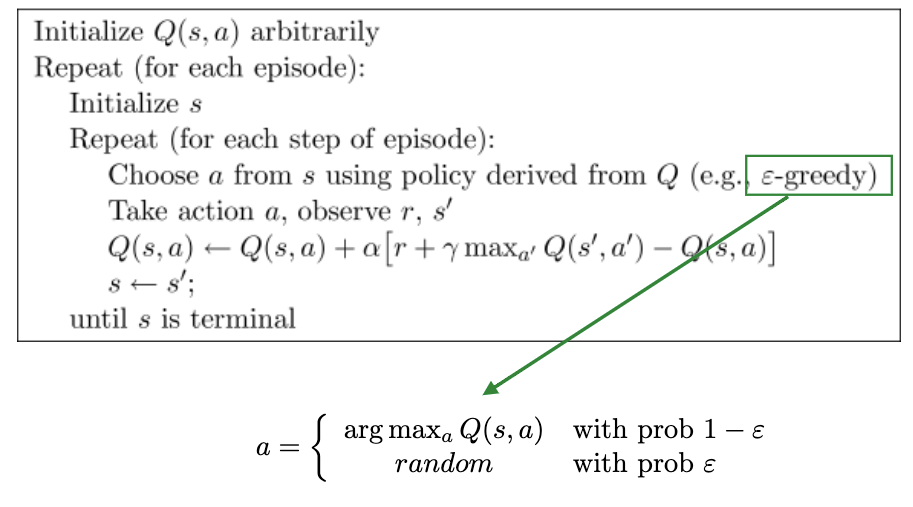

We draw a random number, and if it is below our epsilon threshold then we choose a random action - either hit or stand, this is for exploration. Otherwise, we iterate through all of our possible actions for our current state and we choose the best action that we've seen for the state. Our comparison value is first at -100 because any action is best initially and we update it to find the best action at each state (either hit or stand) based on the outcome.

We also define a giveCredit method which gives a reward and updates the Q value based on the outcome at that iteration. 

We do this by iterating in reverse of our list of player actions (starting with the latest state then working backwards to initial state) which includes the state_data (sum of player cards, dealer face up card and number of player aces) and the action taken. We assess a reward that is the current Q value + learning rate (step size)*(utility of action taken (winner of game) - current Q value). We update the Q value based on the reward (estimations array). 

In [ ]:
# AI player
# The strategies of players are implemented here. The following is the implementation of the \eps-greedy RL algorithm
# In your own project, this class should be changed based on the game of your choice and the algorithm you use
class Player:
    # @step_size: the step size to update estimations
    # @epsilon: the probability to explore
    def __init__(self, step_size=0.1, epsilon=0.1):
        self.estimations = {}
        #initialize estimations values
        for i in range(12,22):
            for j in range(2,12):
                for k in range(0,5):
                    self.estimations[(i,j,k)] = {}
                    for a in [1,0]:
                        if i==21 and a==0:
                            self.estimations[(i,j,k)][a] = 1
                        else:
                            self.estimations[(i,j,k)][a] = 0

        self.step_size = step_size
        self.epsilon = epsilon
        self.state = None;        
        self.greedy = []
        self.symbol = 0
        self.player_action_list = []

    def reset(self):
        self.state = None
        self.greedy = []
        self.player_action_list = []

    def set_state(self, state):
        self.state = state
        #self.state.print_state
        self.greedy.append(True)

    #the winner_Value is taken from calling self.winner(state.data[0], dealer_sum) in the judger class
    def giveCredit(self, winner_value):
        for i in reversed(self.player_action_list):
            state_data, action = i[0], i[1]
            reward = self.estimations[tuple(state_data)][action] + self.step_size*(winner_value - self.estimations[tuple(state_data)][action])
            self.estimations[tuple(state_data)][action] = round(reward, 3)


    # choose an action based on the state
    # This is where epsilon-greedy is implemented 
    def act(self):
        player_sum = self.state.data[0]

        #if player_sum is <=11, we should hit
        if player_sum <=11:
            return 1
        
        if player_sum > 21:
          return 0

        # otherwise, we have to use epsilon
        # With probability epsilon, we select a random action 
        if np.random.uniform(0,1) < self.epsilon:
            action = np.random.choice([1,0])
            #action.append(self.symbol)
        else:
            #greedy action here, which is to hit...
            comparison = -100
            action = 0 #defaults to do nothing
            #self.state.print_state()
            for a in self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])]:
                if self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])][a]>comparison:
                    action = a
                    comparison = self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])][a]
        return action

    def save_policy(self):
        with open('policy_%s.bin', 'wb') as f:
            pickle.dump(self.estimations, f)

    def load_policy(self):
        with open('policy_%s.bin', 'rb') as f:
            self.estimations = pickle.load(f)

Dealer Class: In this class, we defined methods to assist with implementation of the basic Dealer, including the act() function for the predetermined strategy of the dealer and the dealer() function to validate the cards drawn.

Act() function defines the basic strategy for the dealer, which is to hit if the current card hand sum is less than 17 and stand if the sum is 17 or greater, with a bust being 21. A hit is defined as 1 and stand is defined as 0.

The Dealer() function takes the result from act() and actually draws the card from the global deck if the action is hit. We also count if an Ace is drawn such that if we exceed 21 with an Ace in our hand then we can count that Ace as a value of 1, subtracting our card hand sum by 10.

In [ ]:
# make a dealer class for blackjack that hits until they have 17 or more or busts
class Dealer:
    def __init__(self):
        self.state = None
        self.dealer_end = 0

    def reset(self):
        self.state = None
        self.dealer_end = 0

    def set_state(self, state):
        self.state = state

    #returns 1 if dealer wants to hit, 0 if dealer stands
    def act(self):
        if self.state.dealer_sum < 17:
            return 1
        else:
            return 0
    
    def dealer(self):
        action = self.act()
        #same logic as NextState for a Player except our action is predetermined (hit if below 17 and stand otherwise)
        if action:
            card = drawCard()
            if card == 11:
                self.state.num_of_dealer_aces += 1
            self.state.dealer_sum += card
        else: #stand
            self.dealer_end = True

        if self.state.dealer_sum > 21:
            if self.state.num_of_dealer_aces > 0:
                self.state.dealer_sum -= 10
                self.state.num_of_dealer_aces -=1
            else:
                self.dealer_end = True
        
        return self.dealer_end


HumanPlayer: this class is adapted from our previous Dealer class. However, it allows for the manual input for determining the action in act(): either 'h' or 's' so either hit or stand, respectively. 

The Human() function is similar to the dealer() class in Dealer, as it validates our cards drawn, checks if we exceed 21 and sees if we have an Ace to turn its value from 11 (default) to 1. It also defines our end game state variable human_end, which shows if we should end our game (human has busted or action is to stand) or continue it (human does not exceed 21 after hitting). We also print_state to show our card hand sum and opponent's after every turn.

We also define our train(), compete() and play() functions, which simply set up applicable objects and run Judger's play function, recording results each iteration.

train() starts a Player() with epsilon value 0.1 by default against a Dealer().

compete() starts a Player() with epsilon value 0 (as it is not learning at this point) against a Dealer().

play() starts a Player() with epsilon value 0 (as it is not learning still at this point) against a HumanPlayer().





In [ ]:
# human interface
# This class allows us humans to play with AI agent
# In your project, this class should be modified based on the game of your choice
class HumanPlayer:
    def __init__(self, **kwargs):
          self.symbol = None
          self.keys = ['s', 'h']
          self.state = None
          self.human_end = False

    def reset(self):
          pass

    def set_state(self, state):
          self.state = state

    def act(self):
          key = input("Press 'h' to hit or press 's' to stand:")
          while True:
              try:
                  data = self.keys.index(key)
                  break
              except KeyError:
                  print("Please enter 'h' or 's' for hit or stand")
                  key = input()
          return data
          
    def Human(self):
          action = self.act()
          #same logic as NextState for a Player except our action is predetermined (hit if below 17 and stand otherwise)
          if action:
              card = drawCard()
              if(card == 11):
                print("Drew an Ace")
              elif(card == 10):
                print("Drew a", np.random.choice(['10', 'Jack', 'Queen', 'King'], p=[0.25, 0.25, 0.25, 0.25]))
              else:
                print("Drew a", card)
              
              if card == 11:
                  self.state.num_of_dealer_aces += 1
              self.state.dealer_sum += card
          else: #stand
              self.human_end = True
                
          if self.state.dealer_sum > 21:
              if self.state.num_of_dealer_aces > 0:
                  self.state.dealer_sum -= 10
                  self.state.num_of_dealer_aces -=1
              else:
                  self.state.print_state()
                  print("You busted :(")
                  self.human_end = True
                  return self.human_end

          self.state.print_state()
          
          return self.human_end

# Training phase
# epochs is the number of games to play during the training phase
def train(epochs, print_every_n=500):
  player1 = Player(epsilon=0.01)
  player2 = Dealer()
  judger = Judger(player1, player2)
  player1_win = 0.0
  player2_win = 0.0
  for i in range(1, epochs + 1):
    winner = judger.play(print_state=False)
    if winner == 1:
      player1_win += 1
    if winner == -1:
      player2_win += 1
    if i % print_every_n == 0:
      print('Epoch %d, player 1 winrate: %.02f, player 2 winrate: %.02f' % (i, player1_win / i, player2_win / i))
      #player1.backup()
      #player2.backup()
      judger.reset()
    player1.save_policy()

# This function allows two AI to complete against each other (after the training phase)
def compete(turns):
    player1 = Player(epsilon=0)
    player2 = Dealer()
    judger = Judger(player1, player2)
    player1.load_policy()
    #player2.load_policy()
    player1_win = 0.0
    player2_win = 0.0
    for _ in range(turns):
        winner = judger.play()
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        judger.reset()
    print('%d turns, player 1 win %.02f, player 2 win %.02f' % (turns, player1_win / turns, player2_win / turns))


# The game is a zero sum game. If both players are playing with an optimal strategy, every game will end in a tie, which is why you will see the winning rate goes to zero (i.e., game ends with a tie) when running the code.
# So we test whether the AI can guarantee at least a tie if it goes second.
def play():
    while True:
        print("Starting new round")
        player1 = Player(epsilon=0)
        player2 = HumanPlayer()
        judger = Judger(player1, player2)
        player1.load_policy()
        winner = judger.play()
        if winner == 1:
            #means RL player wins
            print("You lose!\n")
        elif winner == -1:
            #dealer wins
            print("You win!\n")
        else:
            print("It is a tie!\n")



Main: we call train() in HumanPlayer and define our epochs as 10,000 iterations, likewise 10,0000 for compete().

**To stop main and see results, manually interrupt the execution the following code cell and start the next code cells**

In [ ]:
if __name__ == '__main__':
    #print("Start Train Phase")
    train(int(1e4)) # training phase first
    #print("Start Compete Phase")
    compete(int(1e4)) # then two AI complete against each other
    print("Start Play")
    play() # Finally, you can try to play against an AI :-)

Epoch 500, player 1 winrate: 0.38, player 2 winrate: 0.57
Epoch 1000, player 1 winrate: 0.39, player 2 winrate: 0.56
Epoch 1500, player 1 winrate: 0.40, player 2 winrate: 0.54
Epoch 2000, player 1 winrate: 0.40, player 2 winrate: 0.54
Epoch 2500, player 1 winrate: 0.40, player 2 winrate: 0.54
Epoch 3000, player 1 winrate: 0.41, player 2 winrate: 0.53
Epoch 3500, player 1 winrate: 0.41, player 2 winrate: 0.53
Epoch 4000, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 4500, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 5000, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 5500, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 6000, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 6500, player 1 winrate: 0.41, player 2 winrate: 0.52
Epoch 7000, player 1 winrate: 0.42, player 2 winrate: 0.51
Epoch 7500, player 1 winrate: 0.42, player 2 winrate: 0.51
Epoch 8000, player 1 winrate: 0.42, player 2 winrate: 0.51
Epoch 8500, player 1 winrate: 0.42, player 2 winrate: 0.5

ValueError: ignored

**NOTE: These functions overwrite our regular train() method and our regular Player class for the purposes of plotting with different step sizes and epislon values. However, if you want to rereun main (where we play against the RL), you will need to rereun all code before it (or else the overwritten train() and Player class will cause errors)**

In [ ]:
from matplotlib import pyplot as plt
# AI player
# The strategies of players are implemented here. The following is the implementation of the \eps-greedy RL algorithm
# In your own project, this class should be changed based on the game of your choice and the algorithm you use
class Player:
    # @step_size: the step size to update estimations
    # @epsilon: the probability to explore
    def __init__(self, step_size, epsilon):
        self.estimations = {}
        #initialize estimations values
        for i in range(12,22):
            for j in range(2,12):
                for k in range(0,5):
                    self.estimations[(i,j,k)] = {}
                    for a in [1,0]:
                        if i==21 and a==0:
                            self.estimations[(i,j,k)][a] = 1
                        else:
                            self.estimations[(i,j,k)][a] = 0

        self.step_size = step_size
        self.epsilon = epsilon
        self.state = None;        
        self.greedy = []
        self.symbol = 0
        self.player_action_list = []

    def reset(self):
        self.state = None
        self.greedy = []
        self.player_action_list = []

    def set_state(self, state):
        self.state = state
        #self.state.print_state
        self.greedy.append(True)

    #the winner_Value is taken from calling self.winner(state.data[0], dealer_sum) in the judger class
    def giveCredit(self, winner_value):
        for i in reversed(self.player_action_list):
            state_data, action = i[0], i[1]
            reward = self.estimations[tuple(state_data)][action] + self.step_size*(winner_value - self.estimations[tuple(state_data)][action])
            self.estimations[tuple(state_data)][action] = round(reward, 3)


    # choose an action based on the state
    # This is where epsilon-greedy is implemented 
    def act(self):
        player_sum = self.state.data[0]

        #if player_sum is <=11, we should hit
        if player_sum <=11:
            return 1
        if player_sum > 21:
            return 0
        # otherwise, we have to use epsilon
        # With probability epsilon, we select a random action 
        if np.random.uniform(0,1) < self.epsilon:
            action = np.random.choice([1,0])
            #action.append(self.symbol)
        else:
            #greedy action here, which is to hit...
            comparison = -999
            action = 0 #defaults to do nothing
            #self.state.print_state()
            for a in self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])]:
                if self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])][a]>comparison:
                    action = a
                    comparison = self.estimations[(self.state.data[0],self.state.data[1],self.state.data[2])][a]
        return action

    def save_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'wb') as f:
            pickle.dump(self.estimations, f)

    def load_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'rb') as f:
            self.estimations = pickle.load(f)
    def new_policy(self):
        with open('policy_%s.bin' % ('first' if self.symbol == 1 else 'second'), 'wb') as f:
            pickle.dump([], f)

In [ ]:
#define a new train() for plotting purposes

def train(epochs, epsilon_rate, step_size_rate, print_every_n=500):
  player1 = Player(step_size = step_size_rate, epsilon=epsilon_rate)
  player1.new_policy()
  epoch_list = []
  winrate_player1 = []
  winrate_player2 = []
  player2 = Dealer()
  judger = Judger(player1, player2)
  player1_win = 0.0
  player2_win = 0.0
  for i in range(1, epochs + 1):
    winner = judger.play(print_state=False)
    if winner == 1:
      player1_win += 1
    if winner == -1:
      player2_win += 1
    if i % print_every_n == 0:
      #print('Epoch %d, player 1 winrate: %.02f, player 2 winrate: %.02f' % (i, player1_win / i, player2_win / i))
      epoch_list.append(i)
      winrate_player1.append(player1_win / i)
      winrate_player2.append(player2_win / i)
      #player1.backup()
      #player2.backup()
      judger.reset()
    player1.save_policy()
  plt.figure()
  plt.plot(epoch_list, winrate_player1, label='RL Agent winrate')
  plt.plot(epoch_list, winrate_player2, label='Dealer winrate')
  plt.legend()
  plt.xlabel("Epochs")
  plt.ylabel("Win Rate")
  plt.title('Step Size: '+str(step_size_rate)+'\nEpsilon Rate: '+str(epsilon_rate))
  plt.show()

# This function allows two AI to complete against each other (after the training phase)
def compete(turns):
    player1 = Player(epsilon=0, step_size=0)
    player2 = Dealer()
    judger = Judger(player1, player2)
    player1.load_policy()
    #player2.load_policy()
    player1_win = 0.0
    player2_win = 0.0
    for _ in range(turns):
        winner = judger.play()
        if winner == 1:
            player1_win += 1
        if winner == -1:
            player2_win += 1
        judger.reset()
    print('%d turns, player 1 win %.02f, player 2 win %.02f' % (turns, player1_win / turns, player2_win / turns))


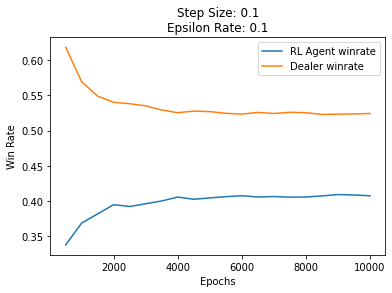

Compete
step_size: 0.1
Epsilon: 0.1
10000 turns, player 1 win 0.42, player 2 win 0.51


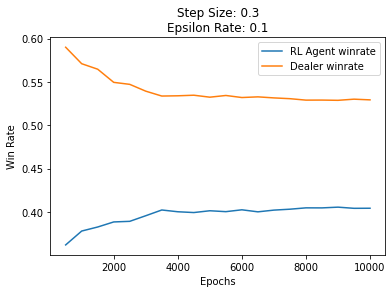

Compete
step_size: 0.1
Epsilon: 0.3
10000 turns, player 1 win 0.43, player 2 win 0.50


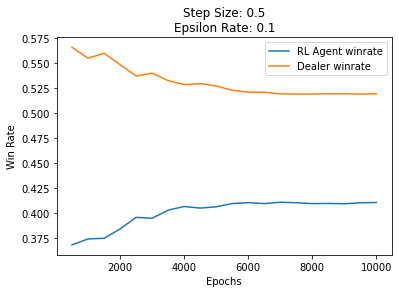

Compete
step_size: 0.1
Epsilon: 0.5
10000 turns, player 1 win 0.42, player 2 win 0.50


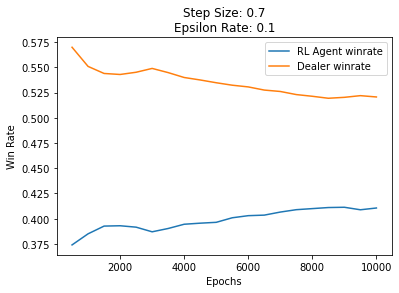

Compete
step_size: 0.1
Epsilon: 0.7
10000 turns, player 1 win 0.40, player 2 win 0.52


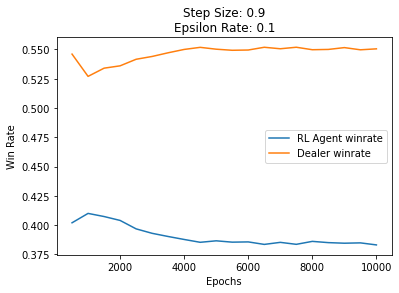

Compete
step_size: 0.1
Epsilon: 0.9
10000 turns, player 1 win 0.42, player 2 win 0.51


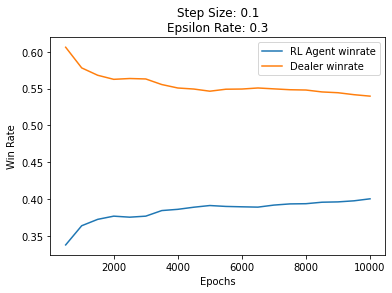

Compete
step_size: 0.3
Epsilon: 0.1
10000 turns, player 1 win 0.42, player 2 win 0.50


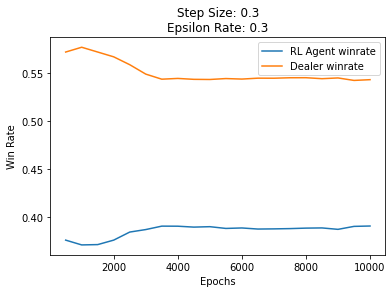

Compete
step_size: 0.3
Epsilon: 0.3
10000 turns, player 1 win 0.41, player 2 win 0.51


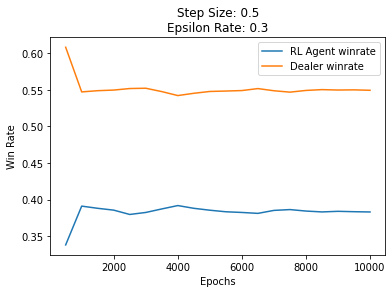

Compete
step_size: 0.3
Epsilon: 0.5
10000 turns, player 1 win 0.41, player 2 win 0.52


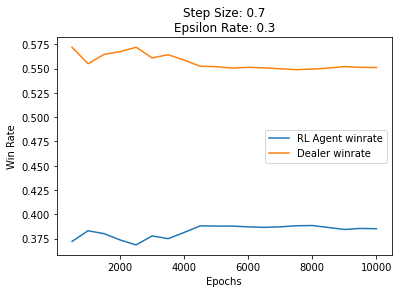

Compete
step_size: 0.3
Epsilon: 0.7
10000 turns, player 1 win 0.42, player 2 win 0.50


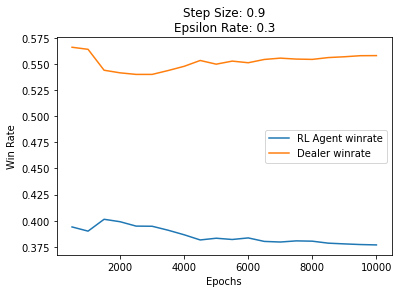

Compete
step_size: 0.3
Epsilon: 0.9
10000 turns, player 1 win 0.40, player 2 win 0.52


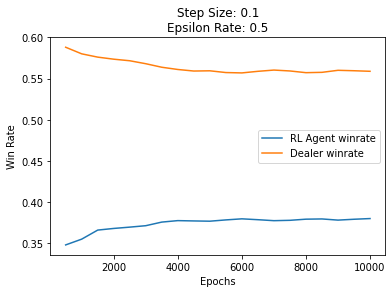

Compete
step_size: 0.5
Epsilon: 0.1
10000 turns, player 1 win 0.43, player 2 win 0.50


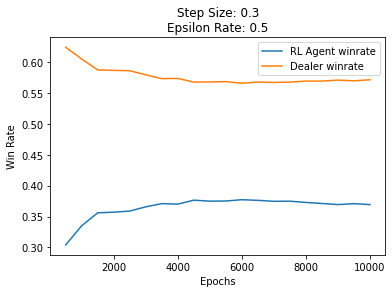

Compete
step_size: 0.5
Epsilon: 0.3
10000 turns, player 1 win 0.42, player 2 win 0.50


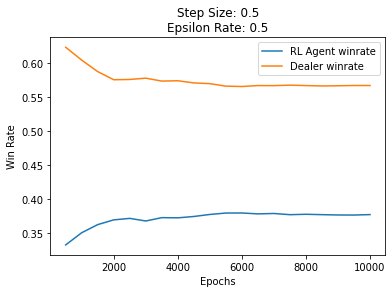

Compete
step_size: 0.5
Epsilon: 0.5
10000 turns, player 1 win 0.42, player 2 win 0.51


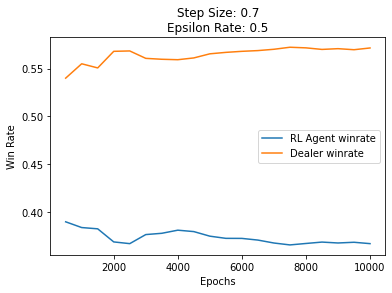

Compete
step_size: 0.5
Epsilon: 0.7
10000 turns, player 1 win 0.40, player 2 win 0.52


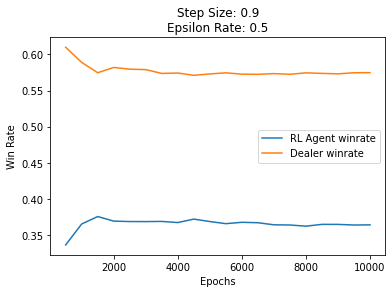

Compete
step_size: 0.5
Epsilon: 0.9
10000 turns, player 1 win 0.40, player 2 win 0.52


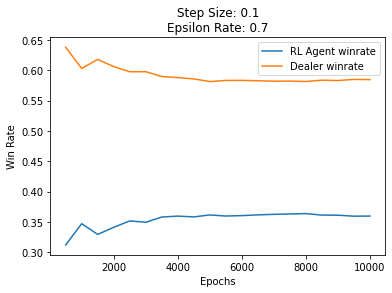

Compete
step_size: 0.7
Epsilon: 0.1
10000 turns, player 1 win 0.43, player 2 win 0.49


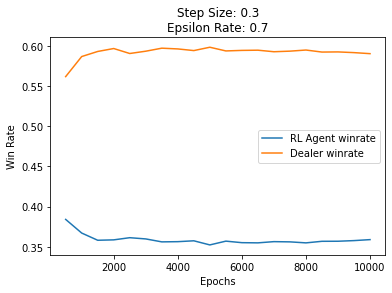

Compete
step_size: 0.7
Epsilon: 0.3
10000 turns, player 1 win 0.43, player 2 win 0.50


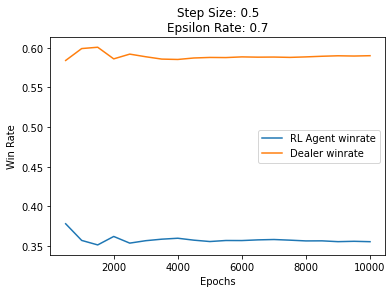

Compete
step_size: 0.7
Epsilon: 0.5
10000 turns, player 1 win 0.41, player 2 win 0.52


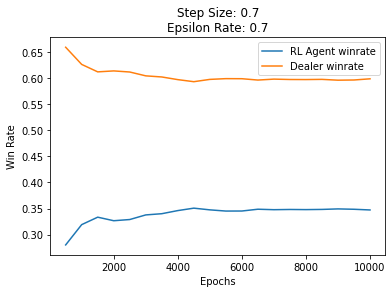

Compete
step_size: 0.7
Epsilon: 0.7
10000 turns, player 1 win 0.41, player 2 win 0.52


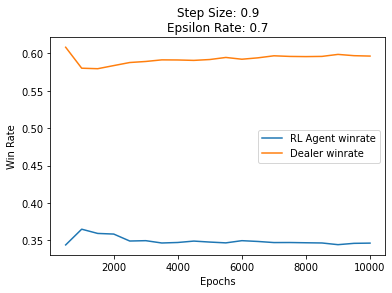

Compete
step_size: 0.7
Epsilon: 0.9
10000 turns, player 1 win 0.42, player 2 win 0.51


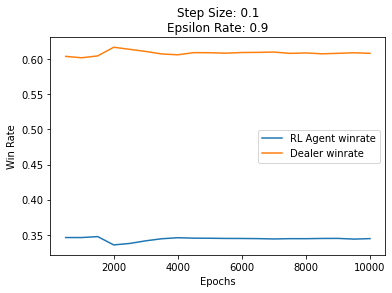

Compete
step_size: 0.9
Epsilon: 0.1
10000 turns, player 1 win 0.42, player 2 win 0.51


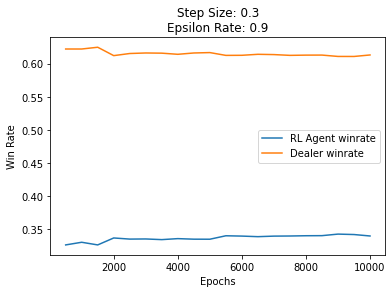

Compete
step_size: 0.9
Epsilon: 0.3
10000 turns, player 1 win 0.43, player 2 win 0.51


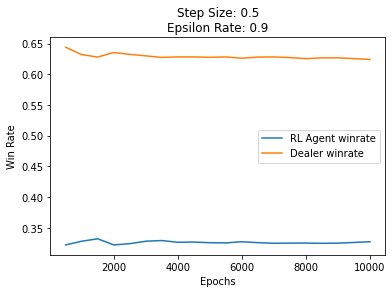

Compete
step_size: 0.9
Epsilon: 0.5
10000 turns, player 1 win 0.41, player 2 win 0.53


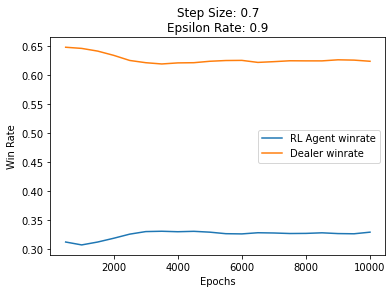

Compete
step_size: 0.9
Epsilon: 0.7
10000 turns, player 1 win 0.42, player 2 win 0.51


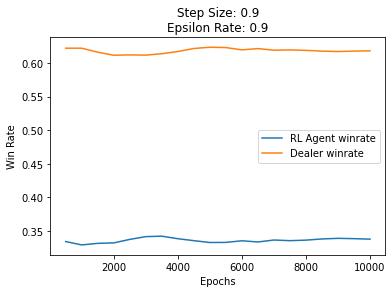

Compete
step_size: 0.9
Epsilon: 0.9
10000 turns, player 1 win 0.40, player 2 win 0.53


In [ ]:
step_size_list = [0.1,0.3,0.5, 0.7, 0.9]
epsilon_list = [0.1,0.3,0.5, 0.7, 0.9]


for i in step_size_list:
  for j in epsilon_list:
    train(int(1e4), i, j)
    print("Compete")
    print("step_size: "+str(i) +"\nEpsilon: "+str(j))
    compete(int(1e4))

We note that higher epsilon value encourage the results to follow more random-walk type motions in our convergences in train(). Note that we expect the average player win rate (going first against a dealer) is expected to fall within 42-43% (source:https://towardsdatascience.com/how-much-will-100-000-win-you-at-blackjack-1c8344885b49#:~:text=Let's%20look%20at%20the%20winning,play%20a%20significant%20number%20of). The expected lose rate (or dealer win rate) is 49% (meaning the remainer % is the % to tie). Almost all of these results, in their compete phase, fall within this rate (especially after 1e4 iterations). We do note that higher epsilons lead to slower convergnces to our expected win rates - lower epsilons are more stable after they approach their expected win rates. From the results, on average, we found that higher step sizes tended to overshoot, causing the win rate for the agent to drop during the initial training. We also found that lower step sizes typically coverged slowly, especially with higher epsilons.